In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import seaborn as sns



In [2]:
data=pd.read_csv(r"C:\Users\Daksh\Desktop\LengthOfStay.csv")

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0            12.0    1.390722  30.432418     96          6.5   
1             8.0    0.943164  28.460516     61          6.5   
2            12.0    1.065750  28.843812     64          6.5   
3            12.0    0.906862  27.959007     76          6.5   
4            11.5    1.242854  30.258927     67          5.6   

   secondarydiagnosisnonicd9  discharged  facid  lengthofstay  
0                          4    9/1/2012      B             3  
1                          1    6/2/2012      A             7  
2                          2   9/25/2012      B             3  
3                          1   8/10/2012      A             1  
4                          2  12/24/2012      E             4  

[5 rows x 28 columns]

In [4]:
def dummy(X,column):
    X=X.copy()
    dummies=pd.get_dummies(X[column])
    X=pd.concat([X,dummies],axis=1)
    X=X.drop(column,axis=1)
    return X

In [5]:
def remove_outliers_iqr(X):
    # Select only numeric columns
    numeric_X = X.select_dtypes(include=[np.number])  # Include only numeric types (int, float)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_X.quantile(0.25)
    Q3 = numeric_X.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define bounds for filtering
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only non-outlier rows
    return X[~((numeric_X < lower_bound) | (numeric_X > upper_bound)).any(axis=1)]

In [6]:
def plot_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True)
    plt.title(title)
    plt.xlabel("Length of Stay")
    plt.ylabel("Frequency")
    plt.axvline(data.mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(data.median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

In [7]:
def preprocess(X):
    X = X.copy()
    
    # Drop unnecessary columns
    X = X.drop(["discharged", "vdate"], axis=1)
    
    # Convert categorical features to dummy variables
    X = dummy(X, "gender")
    X = dummy(X, "facid")
    X = dummy(X, "rcount")
    
    # Separate target variable
    Y = X["lengthofstay"].copy()
    X = X.drop("lengthofstay", axis=1)

    # Plotting before removing outliers
    plot_distribution(Y, "Original Distribution of Length of Stay")  # Call to plot before outlier removal

    # Remove outliers using IQR method
    X = remove_outliers_iqr(X)
    
    # Keep the target variable `Y` aligned with `X`
    Y = Y[X.index]  # Keep only rows from Y that are not outliers

    # Plotting after removing outliers
    plot_distribution(Y, "Distribution of Length of Stay After Removing Outliers")  # Call to plot after outlier removal
    
    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    return X_train, X_test, Y_train, Y_test



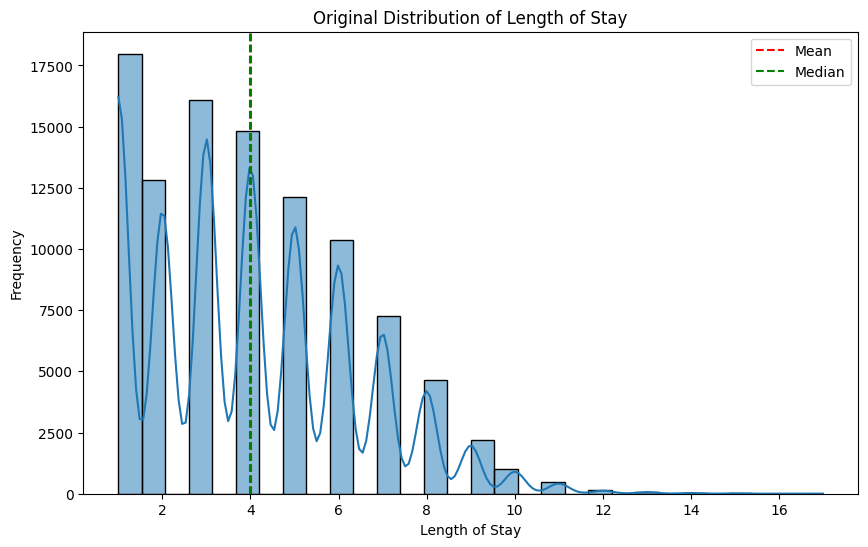

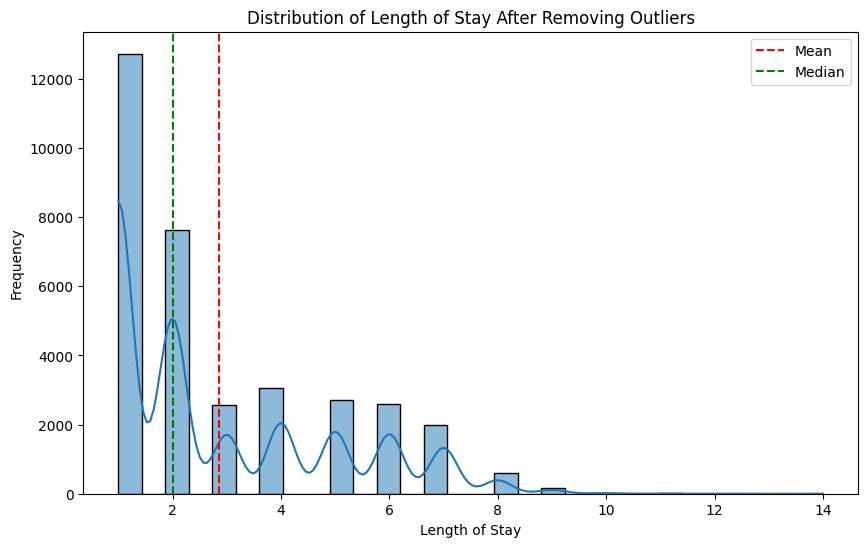

In [8]:

X_train, X_test, Y_train, Y_test=preprocess(data)
feature_names=X_train.columns.tolist()

In [9]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
sgdr=SGDRegressor()


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
rf=RandomForestRegressor();
svr=SVR()
# Initialize models
models = {
    'SGD Regressor': sgdr,
    'Random Forest Regressor': rf,
    'Support Vector Regressor': svr
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    
    # Store the results
    results[name] = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R² Score': r2
    }

# Print the results for each model
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")




Results for SGD Regressor:
Mean Absolute Error (MAE): 0.5859289742256282
Mean Squared Error (MSE): 0.5319241268168379
Root Mean Squared Error (RMSE): 0.7293312874248834
R² Score: 0.8763237306579003

Results for Random Forest Regressor:
Mean Absolute Error (MAE): 0.22358848864526232
Mean Squared Error (MSE): 0.1702090446358653
Root Mean Squared Error (RMSE): 0.41256398853494874
R² Score: 0.9604251460169331

Results for Support Vector Regressor:
Mean Absolute Error (MAE): 0.3829112995183976
Mean Squared Error (MSE): 0.3153560139022689
Root Mean Squared Error (RMSE): 0.5615656808444306
R² Score: 0.9266774087736429


In [12]:
user_input=[]
for feature in feature_names:
    user_input.append(float(input(f"enter the value for { feature}")))
user_input=np.array(user_input).reshape(1,-1)

enter the value for eid 1
enter the value for dialysisrenalendstage 1
enter the value for asthma 1
enter the value for irondef 1
enter the value for pneum 1
enter the value for substancedependence 1
enter the value for psychologicaldisordermajor 1
enter the value for depress 1
enter the value for psychother 1
enter the value for fibrosisandother 1
enter the value for malnutrition 1
enter the value for hemo 1
enter the value for hematocrit 1
enter the value for neutrophils 1
enter the value for sodium 1
enter the value for glucose 1
enter the value for bloodureanitro 1
enter the value for creatinine 1
enter the value for bmi 1
enter the value for pulse 1
enter the value for respiration 1
enter the value for secondarydiagnosisnonicd9 1
enter the value for F 1
enter the value for M 0
enter the value for A 1
enter the value for B 0
enter the value for C 0
enter the value for D 0
enter the value for E 0
enter the value for 0 0
enter the value for 1 1
enter the value for 2 1
enter the value 

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

user_input_scaled=scaler.transform(user_input)
prediction=rf.predict(user_input_scaled)


In [16]:

ans=prediction[0]
if ans<=5:
    print("1-5 days")
elif ans<=10:
    print("6-10 days")
elif ans<=15:
    print("11-15 days")
elif ans<=20:
    print("16-20 days")

1-5 days
